This problem was adapted from Professor Farimani's paper. If you are interested in learning more, you can read it <a href="https://www.nature.com/articles/s41699-018-0060-8.pdf">here</a>.

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import model_selection
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
# (a)
# data preprocessing
raw_data = pd.read_csv('data.csv', skiprows=0)
# raw_data = np.genfromtxt('data.csv', delimiter=',' ,dtype=None)
print(raw_data.shape)
temp = np.arange(0, raw_data.shape[1], 2).tolist()
features = np.zeros( (int(raw_data.shape[0]*raw_data.shape[1]/2) , 2))
labels = np.zeros((features.shape[0], 1))
print(features.shape)
count=0
for i in temp:
    features[count*raw_data.shape[0] : (count+1)*raw_data.shape[0] , :] = raw_data.values[:, i:i+2]
    labels[count*raw_data.shape[0] : (count+1)*raw_data.shape[0] , 0] = count
    count=count+1
data_comb = np.append(features,labels, axis=1)
data_train, data_test = sk.model_selection.train_test_split( data_comb, test_size=0.3, train_size= 0.7 )
print(data_train.shape, data_test.shape)

X_train = data_train[:, 0:data_train.shape[1]-1]
Y_train = data_train[:, data_train.shape[1]-1]

X_test = data_test[:, 0:data_test.shape[1]-1]
Y_test= data_test[:, data_test.shape[1]-1]

(100, 40)
(2000, 2)
(1400, 3) (600, 3)


In [4]:
np.savetxt("training_data.csv", data_train, delimiter=",")
np.savetxt("test_data.csv", data_test, delimiter=",")

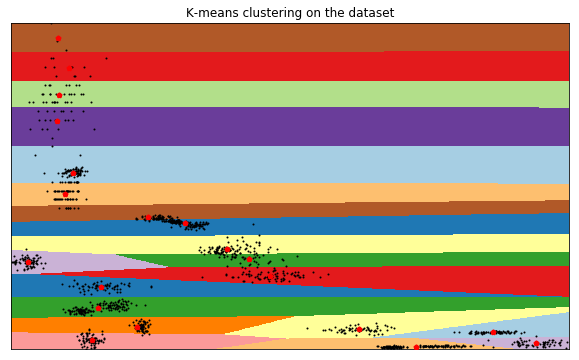

In [13]:
# (b)
# k-means
km = KMeans(n_clusters=20) #, init='random',
#     n_init=10, max_iter=300, 
#     tol=1e-04, random_state=0
# 
y_km = km.fit_predict(X_train)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 1     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize = [10,6])
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_train[:, 0], X_train[:, 1], 'k.', markersize=2)

# Plot the centroids
centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='*', s=10, linewidths=3,
            color='r', zorder=10)
plt.title('K-means clustering on the dataset')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()



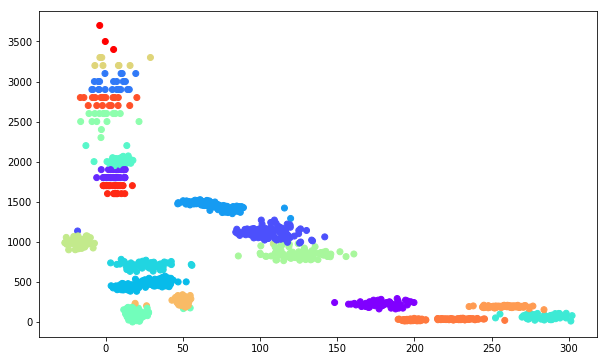

In [8]:
# Second plot
plt.figure(2, figsize = [10, 6])
plt.clf()
plt.scatter(X_train[:,0],X_train[:,1], c=km.labels_, cmap='rainbow')

C:\Users\rosha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training set begins
Training accuracy is  99.64285714285714 %
Test set begins
Test accuracy is  96.83333333333334 %


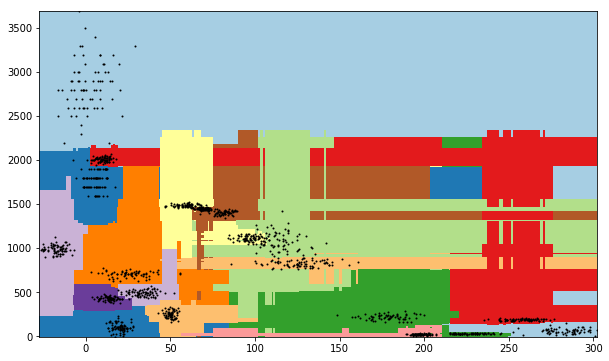

In [6]:
# (c)
# random forest
#Create a Gaussian Classifier
clf1=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train,Y_train)

# Obtain labels for each point in mesh. Use last trained model.
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(3, figsize = [10,6])
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_train[:, 0], X_train[:, 1], 'k.', markersize=2)

# Predictions for training set
print("Training set begins")
Y_pred_train = clf1.predict(X_train)
# print(Y_pred, Y_train.shape)

# Compute train accuracy and test accuracy
count = 0
for i in range(Y_train.shape[0]):
    count += int(Y_pred_train[i] == Y_train[i])
train_acc = float(count)/Y_train.shape[0]

print('Training accuracy is ', train_acc*100, '%')

# Predictions for test set
print("Test set begins")
Y_pred_test = clf1.predict(X_test)
# print(Y_pred_test.shape)

# Compute test accuracy
count = 0
for i in range(Y_test.shape[0]):
    count += int(Y_pred_test[i] == Y_test[i])
test_acc = float(count)/Y_test.shape[0]

print('Test accuracy is ', test_acc*100, '%')



[94.0, 93.83333333333333, 96.66666666666667, 96.16666666666667, 97.66666666666667, 95.83333333333333, 96.5, 97.33333333333333, 96.66666666666667, 98.16666666666667, 98.0, 97.0, 97.16666666666667, 96.83333333333333, 97.33333333333333, 97.66666666666667, 96.83333333333333, 97.5, 98.0, 97.5, 96.5, 97.83333333333333, 97.33333333333333, 97.33333333333333, 97.33333333333333]


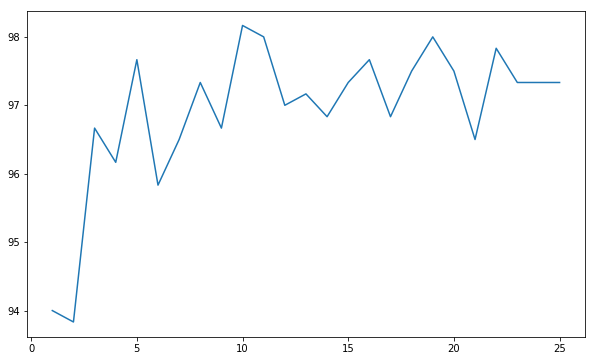

In [7]:
test_acc = []
for i_1 in range(1,26):
    clf2=RandomForestClassifier(n_estimators = i_1)
    clf2.fit(X_train,Y_train)
    
    Y_pred = clf2.predict(X_test)
    
    count = 0
    for i in range(X_test.shape[0]):
        count += int(Y_pred[i] == Y_test[i])
    test_acc.append(float(count*100)/Y_test.shape[0])

print(test_acc)
plt.figure(4, figsize = [10,6])
plt.clf()
plt.plot(range(1,26), test_acc)

# Analysis
In the first case of unsupervised learning, k-means classifier seems to be doing a good job at segregating the data and the centroids seem well centered on the data cluster. 

For the supervised learning, we can observe a good accuracy for the Random Forest Classifier for the test case. The training accuracy is almost 100, which can be representative of overfitting. The decision boundaries in the k-means are smoother than the rectangular sections obtained in the Random Forest.

We can observe that as we increase the number of estimators in Random Forest, the accuracy trend goes up upto a point and then levels off around N = 10.